# My Historical Performance


In [3]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import statistics

%matplotlib inline
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

In [2]:
file_path = 'C:/Users/dcste/OneDrive/Economics_Research/Economics_Research/etrade_performance.xlsx'
performance = pd.read_excel(file_path, parse_dates=True).set_index("Date")

In [5]:
performance.corr()

,Stein_Account,SPY,NASDAQ,RUT2000,OIL
Stein_Account,1.000000,-0.378817,-0.465607,-0.289939,0.399418
SPY,-0.378817,1.000000,0.954112,0.958101,-0.242764
NASDAQ,-0.465607,0.954112,1.000000,0.895903,-0.471517
RUT2000,-0.289939,0.958101,0.895903,1.000000,-0.119302
OIL,0.399418,-0.242764,-0.471517,-0.119302,1.000000


<AxesSubplot:title={'center':'Growth of One Dollar Invested'}, xlabel='Date'>

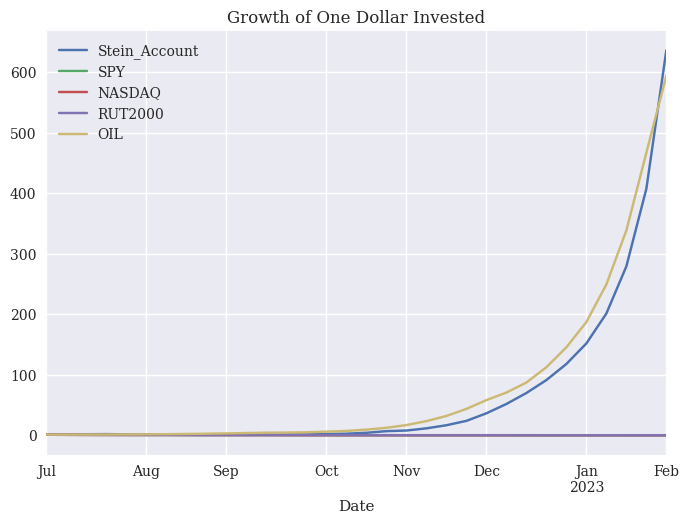

In [4]:
((1+performance.loc['2022-07-01':,]).cumprod()).plot(title = 'Growth of One Dollar Invested')

<Figure size 1200x600 with 0 Axes>

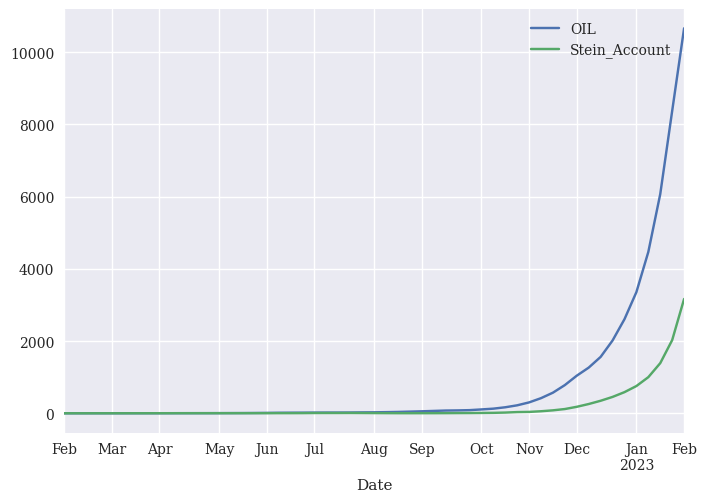

<Figure size 1200x600 with 0 Axes>

In [5]:
(1+performance[['OIL','Stein_Account']]).cumprod().plot()
plt.figure(figsize=(12,6))

Slice the data frame starting June 17,2022
- That is when you started really trading 

In [6]:
df_performance = performance.loc['2022-06-17':]

In [7]:
df_performance.describe()

,Stein_Account,SPY,NASDAQ,RUT2000,OIL
count,34.000000,34.000000,34.000000,34.000000,34.000000
mean,0.249618,-0.114888,-0.175244,-0.076788,0.217615
std,0.259403,0.038901,0.050931,0.046519,0.113838
min,-0.318900,-0.191500,-0.250500,-0.154300,0.014100
25%,0.105400,-0.133400,-0.214700,-0.105450,0.110125
50%,0.298850,-0.115950,-0.181250,-0.083900,0.220150
75%,0.441625,-0.086175,-0.155175,-0.042600,0.317775
max,0.665000,-0.034200,-0.052500,0.024400,0.388600


In [8]:
def performance(df, annualization = 52):
    perf_df = pd.DataFrame(data = None, columns = ['Mean', 'Sigma','Sharpe','Kurtosis','Var(5%)'], index = df.columns)
    for i in df.columns:
        perf_df.loc[i,'Mean'] = df[i].mean()*annualization
        perf_df.loc[i,'Sigma'] = df[i].std()*np.sqrt(annualization)
        perf_df.loc[i,'Sharpe'] = df[i].mean()*annualization/(df[i].std()*np.sqrt(annualization))
        perf_df.loc[i,'Kurtosis'] = df[i].kurtosis()
        perf_df.loc[i,'Var(5%)'] = (df[i].std()*np.sqrt(annualization))*-1.65
    return perf_df.style.format('{:,.2%}')

In [9]:
per_df = performance(df_performance)

In [12]:
per_df

,Mean,Sigma,Sharpe,Kurtosis,Var(5%)
Stein_Account,"1,298.01%",187.06%,693.91%,-24.83%,-308.65%
SPY,-597.42%,28.05%,"-2,129.69%",-24.30%,-46.29%
NASDAQ,-911.27%,36.73%,"-2,481.19%",-17.33%,-60.60%
RUT2000,-399.30%,33.55%,"-1,190.33%",-58.79%,-55.35%
OIL,"1,131.60%",82.09%,"1,378.49%",-123.73%,-135.45%


- Annualized I am getting almost a 1300% return with a standard deviation of 187% which is absolutely insane after 6 months of trading because your risk is just **too high.** 

In [10]:
df_performance.columns

Index(['Stein_Account', 'SPY', 'NASDAQ', 'RUT2000', 'OIL'], dtype='object')

Text(0, 0.5, 'Return')

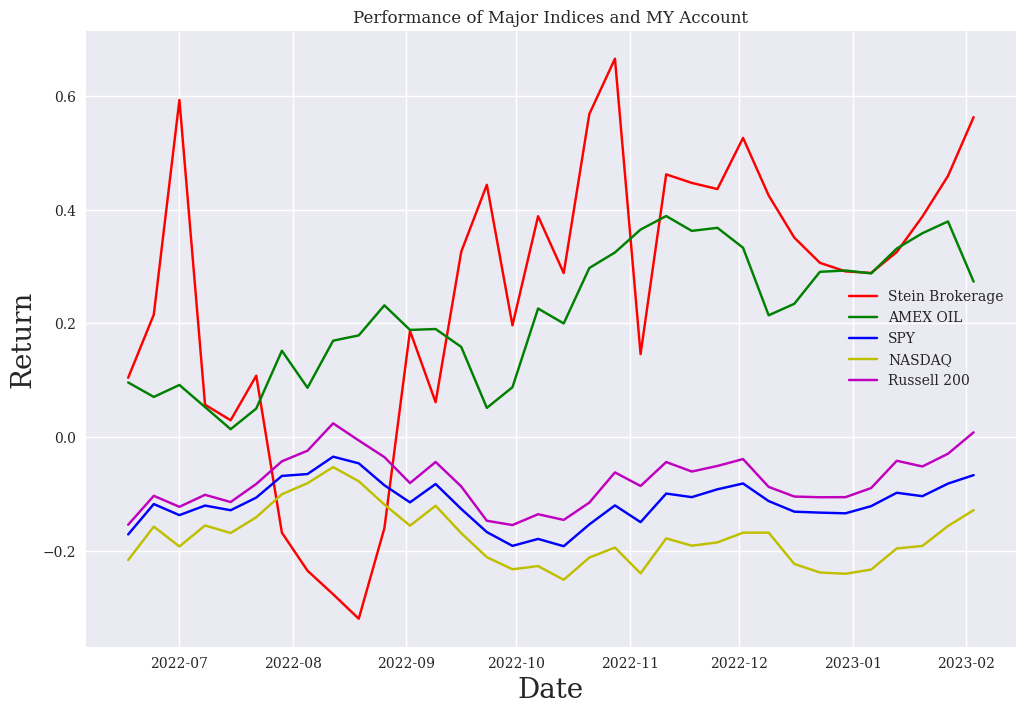

In [11]:
plt.figure(figsize = (12,8))
plt.plot(df_performance['Stein_Account'], c = 'r', label = 'Stein Brokerage')
plt.plot(df_performance['OIL'], c = 'g', label = 'AMEX OIL')
plt.plot(df_performance['SPY'], c = 'b', label = 'SPY')
plt.plot(df_performance['NASDAQ'], c = 'y', label = 'NASDAQ')
plt.plot(df_performance['RUT2000'], c = 'm', label = 'Russell 200')
plt.legend(loc = 0)
plt.title('Performance of Major Indices and MY Account')
plt.xlabel('Date', size = 20)
plt.ylabel('Return',size =20 )